In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Demo Data

In [2]:
seq1a = np.array([[0.30, 0.40, 0.50, 0.60, 0.50, 0.40, 0.30, 0.40, 0.50, 0.60],
                    [0.80, 0.90, 0.90, 0.80, 0.60, 0.50, 0.40, 0.40, 0.40, 0.40]])

seq2a = np.array([[0.29, 0.36, 0.46, 0.58, 0.53, 0.46, 0.36, 0.29, 0.43, 0.54, 0.59, 0.6077],
                    [0.80, 0.89, 0.89, 0.81, 0.66, 0.57, 0.47, 0.40, 0.40, 0.40, 0.42, 0.4299]])

target_seq, input_seq = seq1a, seq2a
target_seq.shape, input_seq.shape

((2, 10), (2, 12))

In [3]:
target_seq # Input in col wise (each col time 1, time 2, ... , time n ) However, input should be passed [x1, x2,..., xn]

array([[0.3, 0.4, 0.5, 0.6, 0.5, 0.4, 0.3, 0.4, 0.5, 0.6],
       [0.8, 0.9, 0.9, 0.8, 0.6, 0.5, 0.4, 0.4, 0.4, 0.4]])

## DTW Class

In [4]:
class DTW_stream_2d: # Add buffer
  def __init__(self, target_seq) -> None:
     self._target_seq = target_seq
     self._S = self._init_S()
     self._j = 1

  def _init_S(self):
    S = np.zeros((len(self._target_seq[0])+1, 2))
    S[1:, 0] = np.inf
    S[0, 1:] = np.inf
    return S

  def _step(self,input):
    for i in range(1, self._S.shape[0]):
      cost = np.linalg.norm(self._target_seq[:, i-1] - input)
      self._S[i,self._j] = cost + np.min([self._S[i-1, self._j],   # increment
                            self._S[i, self._j-1],   # decrement
                            self._S[i-1, self._j-1]]) # match

    curr_score = self._S[i,j] # Curr score

    new_col = np.zeros((len(self._target_seq[0])+1, 1))
    new_col[0,0] = np.inf
    self._S = np.concatenate((self._S, new_col), axis=1)
    self._j += 1

    return curr_score

  def eval(self, input):
    return float(self._step(input))

In [5]:
dtw_stream = DTW_stream_2d(target_seq)

scores = []
for j in range(input_seq.shape[1]): # Stream sim
  input = input_seq[:,j]
  print(f"Input: {input_seq[:,j]}")
  curr_score = dtw_stream.eval(input)
  scores.append(curr_score)
  print(f"Curr_Score: {curr_score:.2f}")

Input: [0.29 0.8 ]
Curr_Score: inf
Input: [0.36 0.89]
Curr_Score: 3.08
Input: [0.46 0.89]
Curr_Score: 3.12
Input: [0.58 0.81]
Curr_Score: 2.96
Input: [0.53 0.66]
Curr_Score: 2.47
Input: [0.46 0.57]
Curr_Score: 1.56
Input: [0.36 0.47]
Curr_Score: 1.08
Input: [0.29 0.4 ]
Curr_Score: 0.85
Input: [0.43 0.4 ]
Curr_Score: 0.91
Input: [0.54 0.4 ]
Curr_Score: 0.56
Input: [0.59 0.42]
Curr_Score: 0.42
Input: [0.6077 0.4299]
Curr_Score: 0.38


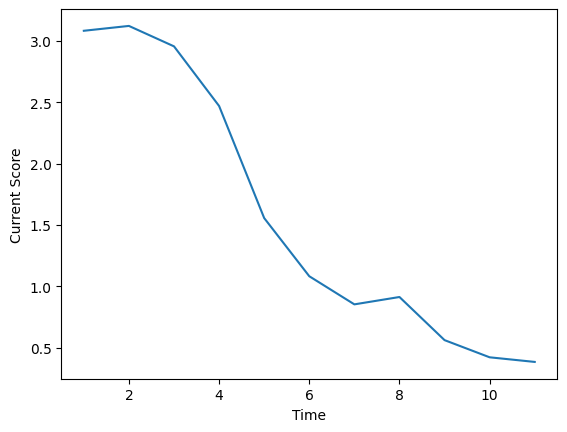

In [6]:
plt.plot(scores)
plt.ylabel("Current Score")
plt.xlabel("Time")
plt.show()

Testing

In [7]:
n1 = np.random.rand(2,5) # Noise Between seqs
n1

array([[0.87386138, 0.16887115, 0.03240403, 0.30813219, 0.10380924],
       [0.30539796, 0.30884684, 0.20033082, 0.40191139, 0.31198772]])

In [8]:
input_seq_w_noise = np.concatenate((n1,input_seq), axis=1)
input_seq_w_noise.shape

(2, 17)

In [9]:
dtw_stream = DTW_stream_2d(target_seq)

scores = []
for j in range(input_seq_w_noise.shape[1]): # Stream sim
  input = input_seq_w_noise[:,j]
  #print(f"Input: {input_seq[:,j]}")
  curr_score = dtw_stream.eval(input)
  scores.append(curr_score)
  #print(f"Curr_Score: {curr_score:.2f}")

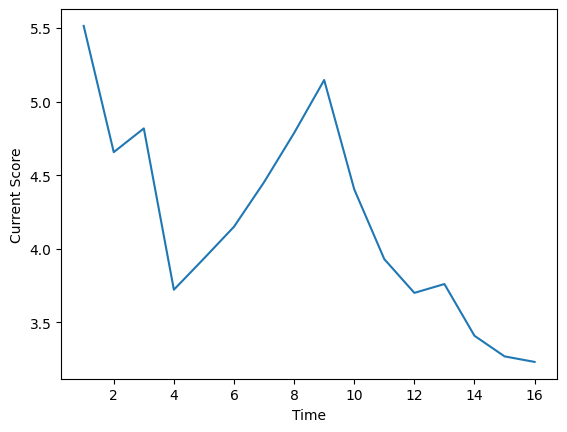

In [10]:
plt.plot(scores)
plt.ylabel("Current Score")
plt.xlabel("Time")
plt.show()